In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', 300)

In [2]:
beere=pd.read_csv('../data/processed/beer_enc4_limited.csv',index_col=0)
beere.head()

,Name,Style,StyleID,ABV,IBU,Color,Simple_style,Style_code
0,Vanilla Cream Ale,Cream Ale,45,5.48,17.65,4.83,Pale Lager/Blonde Ale,1
1,Zombie Dust Clone - EXTRACT,American IPA,7,5.91,59.25,8.98,Pale Ale,2
2,Zombie Dust Clone - ALL GRAIN,American IPA,7,5.80,54.48,8.50,Pale Ale,2
3,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,6.48,17.84,4.57,Pale Lager/Blonde Ale,1
4,Sierra Nevada Pale Ale Clone,American Pale Ale,10,5.58,40.12,8.00,Pale Ale,2


In [3]:
beerE_num=beere[['ABV','IBU','Color','Style_code']]

In [3]:
X=beere[['ABV','IBU','Color']]
y=beere['Style_code']

SCALE THE DATA

In [ ]:
# xxxxxxx scale MINMAX

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

SAVE TO CSV TRAIN/TEST

In [6]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [7]:
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=100000)

In [8]:
predictions = model.predict(X_test)
predicions_proba = model.predict_proba(X)
predicions_proba

array([[5.87489864e-01, 3.91205951e-01, 1.93024186e-02, 1.96947395e-03,
        3.22483333e-05, 4.42099935e-08],
       [4.29141773e-06, 1.26123377e-05, 9.25731766e-01, 6.42534845e-02,
        9.95082236e-03, 4.70232034e-05],
       [2.66896424e-05, 6.70629779e-05, 9.28829386e-01, 6.26604864e-02,
        8.38230218e-03, 3.40726226e-05],
       ...,
       [6.28743820e-03, 8.92197675e-03, 8.80534549e-01, 1.01166382e-01,
        3.08136760e-03, 8.28578760e-06],
       [1.59160210e-04, 7.47782647e-06, 3.63221092e-01, 1.54442799e-01,
        4.74688767e-01, 7.48070323e-03],
       [8.13133309e-06, 2.02265383e-05, 8.65516067e-01, 1.29461344e-01,
        4.97102822e-03, 2.32029512e-05]])

In [9]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
accuracy_score(y_test, predictions)

0.7719429857464366

In [15]:
cm=multilabel_confusion_matrix(y_test, predictions)
cm

array([[[9258,  576],
        [ 350,  480]],

       [[9340,  490],
        [ 300,  534]],

       [[4194,  136],
        [1293, 5041]],

       [[9436,  609],
        [ 139,  480]],

       [[9696,  584],
        [  73,  311]],

       [[8964,   37],
        [ 277, 1386]]], dtype=int64)

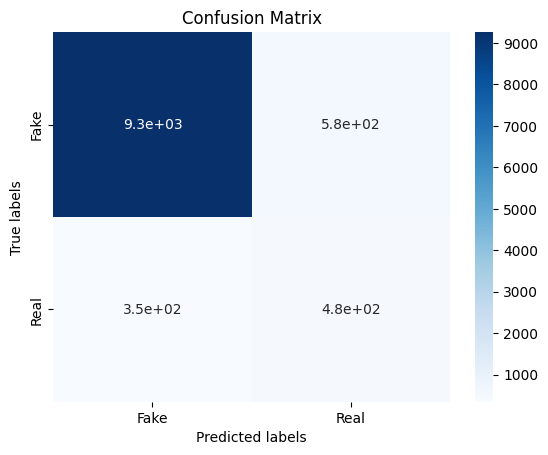

In [18]:
from sklearn.metrics import confusion_matrix
sns.heatmap(cm[0],annot=True,cmap='seismic',vmin=-1);
ax= plt.subplot();
sns.heatmap(cm[0], annot=True,cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Fake','Real']); 
ax.yaxis.set_ticklabels(['Fake','Real']);

In [26]:
cm = confusion_matrix(y_test, predictions,normalize='true')
print(cm)

[[0.57831325 0.35421687 0.0626506  0.00481928 0.         0.        ]
 [0.35371703 0.64028777 0.0059952  0.         0.         0.        ]
 [0.04294285 0.02936533 0.79586359 0.08746448 0.04436375 0.        ]
 [0.01453958 0.01615509 0.10339257 0.77544426 0.0904685  0.        ]
 [0.         0.         0.0390625  0.0546875  0.80989583 0.09635417]
 [0.         0.         0.         0.01803969 0.14852676 0.83343355]]


Text(0.5, 118.72222222222216, 'Predicted label')

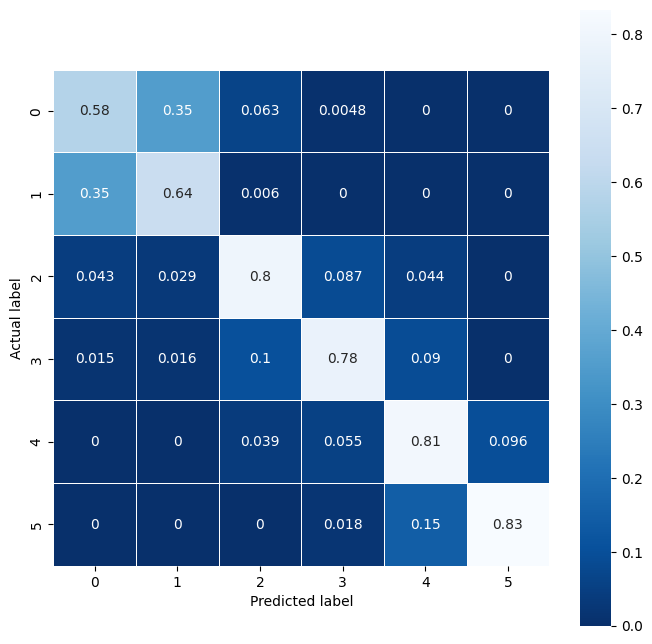

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# all_sample_title = 'Accuracy Score: {0}'.format(score)
# plt.title(all_sample_title, size = 15);